In [69]:
# Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.
# Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.
# Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [70]:

from scipy import stats 
import seaborn as sns
import numpy as np 
import pandas as pd
from statistics import median
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as st

df= pd.read_csv('./datos/India_Menu.csv')

In [99]:
# Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
# Tabla de contingencia

 
pd.crosstab(df['Total carbohydrate (g)'] ,df['Menu Category']).T

Total carbohydrate (g),0.00,0.28,0.33,0.46,0.72,0.73,1.60,1.70,1.99,2.50,...,60.93,64.22,64.75,68.01,72.51,74.25,76.03,77.47,79.04,93.84
Menu Category,,,,,,,,,,,,,,,,,,,,,
Beverages Menu,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Breakfast Menu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Condiments Menu,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Desserts Menu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gourmet Menu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
McCafe Menu,0,1,1,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
Regular Menu,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
#La tabla de contingencia nos muestra la frecuencia entre dos variables, en este caso el total de carbohidratos representados en gramos, 
# con respecto a la categoría del menú al que pertenecen, 
# para mejorar la visibilidad preferimos representar los productos por categoría y no producto por producto.
#Podemos ver por ejemplo que en la categoría Beverages hay dos productos con 0.0 carbohidratos totales.

In [102]:
# Coeficiente de correlación de las variables numéricas del dataset.

matriz_correlacion = np.corrcoef(df['Total carbohydrate (g)'], df['Total Sugars (g)'])
print(matriz_correlacion) 

[[1.         0.50870732]
 [0.50870732 1.        ]]


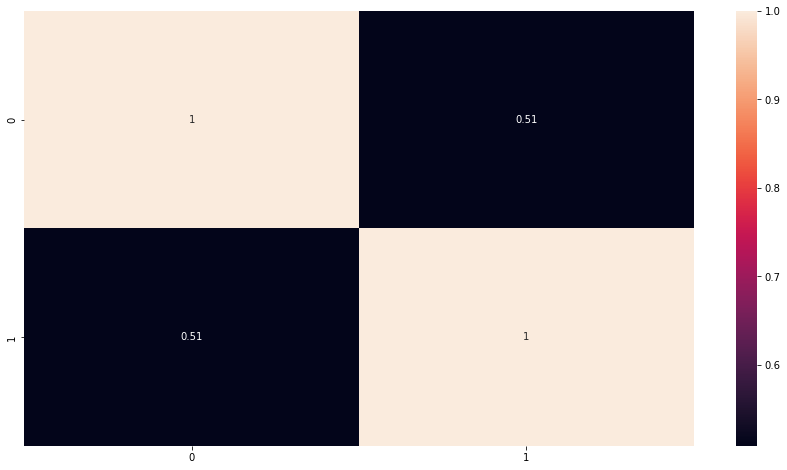

In [103]:
plt.figure (figsize = (15,8))

fig = sns.heatmap(np.corrcoef(df['Total carbohydrate (g)'],df['Total Sugars (g)']), annot = True)

In [79]:
#El coeficiente de correlación entre 'Total carbohydrate (g)' y 'Total Sugars (g)' resultó 0.51, 
# lo que nos indica que no existe una relación líneal entre las dos variables.

In [80]:
# Sesgos de alguna de las variables numéricas del dataset.
skew(df['Total carbohydrate (g)'])

0.36093135285828754

In [ ]:
#Al resultar el sesgo 0.36 nos indica que la distribución de los valores es simétrica respecto a la media. 
# Lo cual podremos observar en la siguiente gráfica

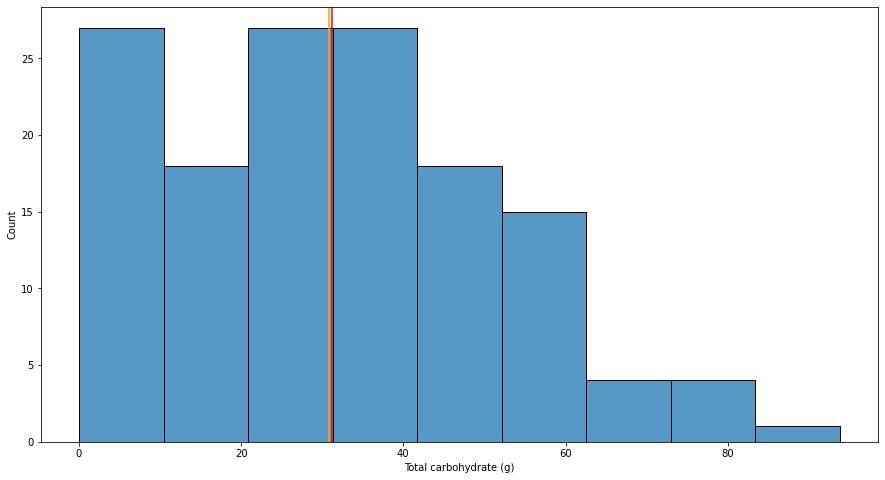

In [88]:
fig, ax = plt.subplots(figsize = (15,8))
sns.histplot(x = 'Total carbohydrate (g)', data = df);

media = np.mean(df['Total carbohydrate (g)'])
mediana = np.median(df['Total carbohydrate (g)'])
plt.axvline(media, color='red')
plt.axvline(mediana, color='orange')
plt.show()

In [104]:
#intervalo de confianza
data = df['Total carbohydrate (g)']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de longitud de los sépalos con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(data))

(27.760085356668956, 34.62048201921757)
31.19028368794326


In [106]:
data = df['Total fat (g)']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de longitud de los sépalos con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(data))

(8.270194656247632, 11.713209599071519)
9.991702127659575


In [107]:

data = df['Total Sugars (g)']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de longitud de los sépalos con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(data))

(12.85250694668664, 18.077280287355904)
15.464893617021271


In [ ]:
#se generaron los intervalos de confianza para 3 de las columnas para poder observar el par de números entre los cuales se estima qeu estará cierto valor, 
#en nuestro caso la media. Estipulamos un porcentaje del 95% de probabilidad de que la media real se encuentre en el intervalo calculado.